## Задание (вопрос 2)

В игре происходят бои. На бой игрок выставляет 4-х бойцов, каждый боец вооружен некоторым оружием.\
После того, как завершается бой, происходит запись информации об этом бое.

Записываются:

* Уникальный id боя.
* Для каждого бойца тип оружия (4 столбца).
* Длительность боя (в секундах).

В некоторый момент были изменены настройки баланса оружия. Нужно понять, повлияло ли
изменение настроек на длительность боя. Считаем, что длительность боя зависит только от
комбинации 4-х оружий, сам порядок не важен. Например, 'меч, меч, лук, булава' и 'лук, меч, булава, меч' - одна и та же комбинация.

Последний столбец в датасете - отметка о том, когда был совершен бой, до изменений в балансе или после.

Ссылка на датасет: https://cloud.mail.ru/public/Gbjc/jroygwWEe

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [285]:
df = pd.read_csv('data_test.csv', encoding='mbcs')

In [286]:
df.head(5)

,battle_id,unit_1,unit_2,unit_3,unit_4,len,balance_mark
0,103921,топор,лук,булава,лук,17.35,before
1,117214,посох,посох,лук,лук,21.84,before
2,115502,меч,посох,булава,топор,16.00,before
3,110102,булава,лук,лук,булава,17.22,before
4,104989,меч,посох,булава,посох,19.20,before


Построим график зависимости длительности боя от целевой переменной (когда был совершен бой, до изменений в балансе или после):

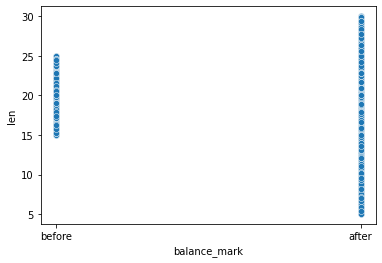

In [288]:
sns.scatterplot(data = df, x = "balance_mark", y = "len")
plt.show()

Найдем все типы оружия, которые могут быть использованы в бою

In [289]:
weapon_list = np.unique(np.reshape(df.iloc[:,1:5].to_numpy(), df.columns[1:5].shape[0] * df.shape[0]))

In [290]:
weapon_dict = {}
for i, elm in enumerate (weapon_list):
    weapon_dict[elm] = i 
weapon_dict

{'булава': 0, 'лук': 1, 'меч': 2, 'посох': 3, 'топор': 4}

Заменим тип оружия на число ('булава' - '1', 'лук' - '2', 'меч' - '3', 'посох' - '4', 'топор' - '5')

In [291]:
for column in df.columns[1:5]:
    df.loc[:, column] = df.loc[:, column].map(weapon_dict)

Построим гистограмму распределений для типа оружия и длительности боя, если бой был совершен ДО изменения баланса

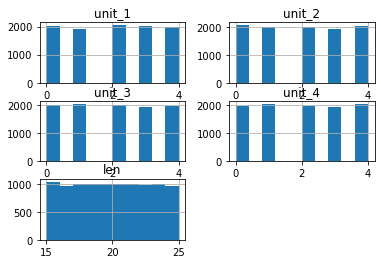

In [294]:
df.loc[df.iloc[:, -1] == 'before', df.columns[1:6]].hist()
plt.show()

Построим гистограмму распределений для типа оружия и длительности боя, если бой был совершен ПОСЛЕ изменения баланса

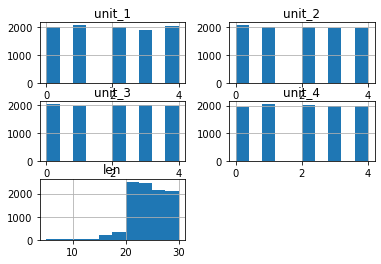

In [295]:
df.loc[df.iloc[:, -1] == 'after', df.columns[1:6]].hist()
plt.show()

Заметим, что выборка сбалансированная:

In [297]:
[df.loc[df.iloc[:, -1] == 'before'].shape[0], df.loc[df.iloc[:, -1] == 'after'].shape[0]]

[10000, 10000]

## Вывод:
предварительный анализ показал, что изменение настроек баланса оружия влияет на длительность боя (до введения новых настроек длительность боя составляла 15-25 с, а после введения настроек длительность составила от 5 до 30 с). 

Интересным фактом является то, что типы оружия в зависимости от того, до или после изменения баланса был совершен бой, распределены равномерно. Длительность боядля случая, когда бой был совершен до изменения баланса, распределена также равномерно, однако если бой был совершен после изменения баланса, то длительность боя в основном распределена в области 20-30 с (с резким скачком) и имеет небольшой "хвост" в области от 5 до 20 с.

Далее проверим продолжительность боя на одинаковых комбинациях оружия.

Отсортируем комбинации оружия по возрастанию, поскольку последовательность выбранного оружия на длительность боя не влияет.

In [299]:
for row in np.arange(0, df.shape[0], 1):
     df.iloc[row, 1:5] = df.iloc[row, 1:5].sort_values()

Найдем уникальные комбинации оружия

In [300]:
unique_rows = np.unique(df.iloc[:, 1:5].to_numpy(), axis = 0)

In [301]:
inv_d = {value: key for key, value in weapon_dict.items()}

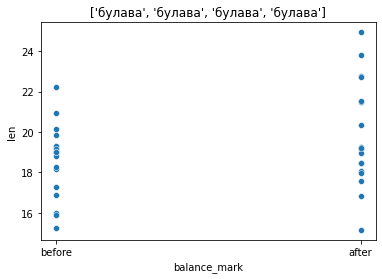

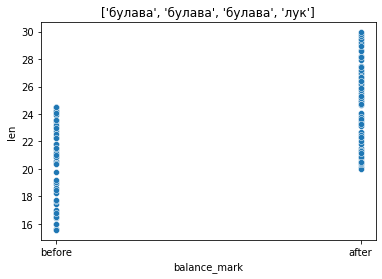

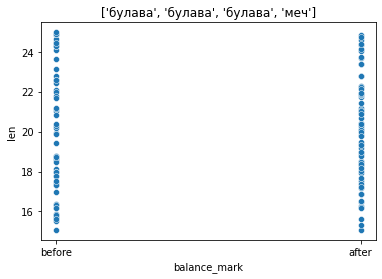

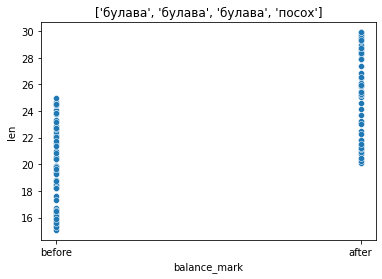

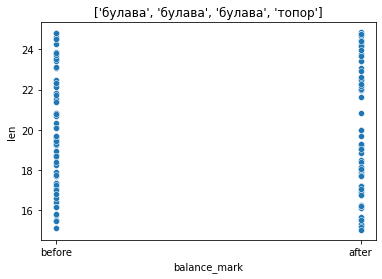

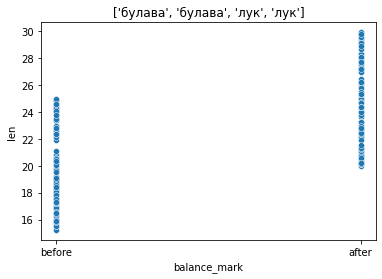

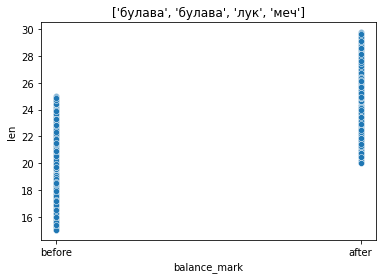

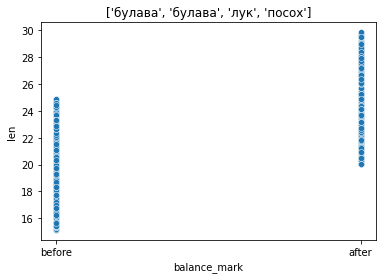

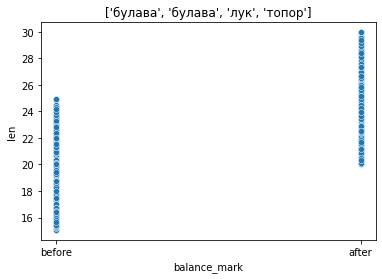

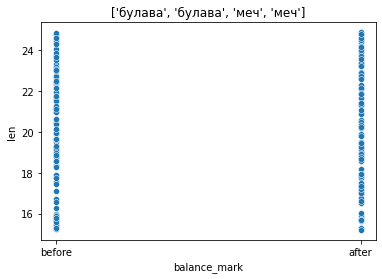

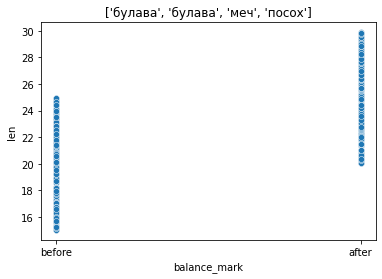

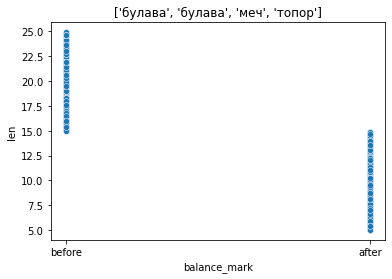

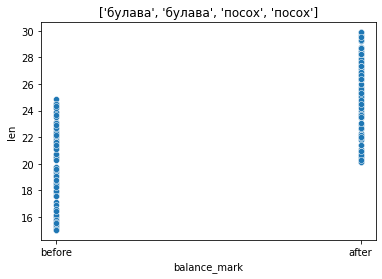

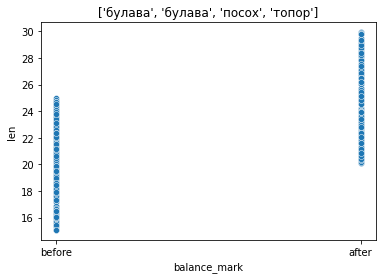

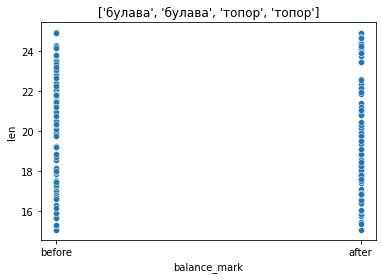

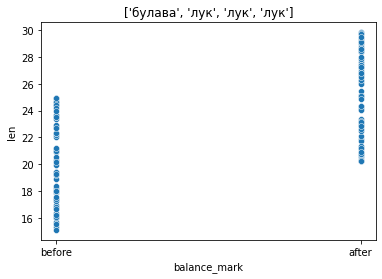

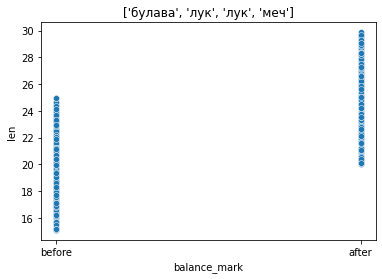

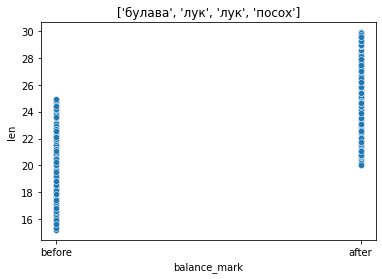

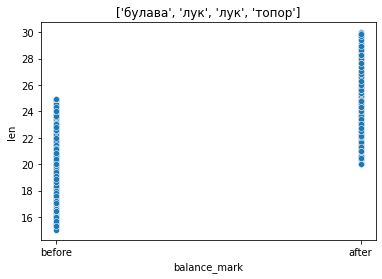

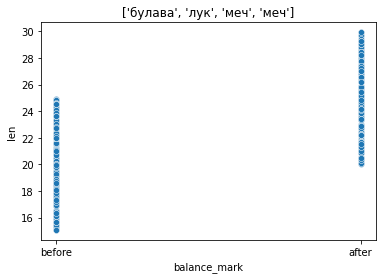

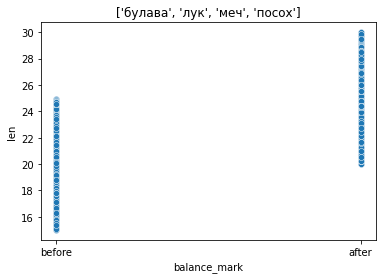

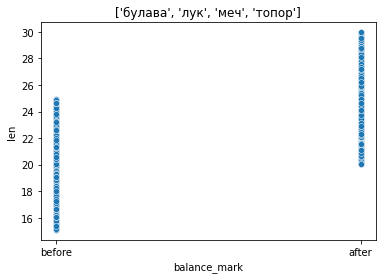

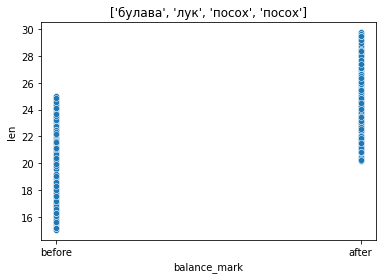

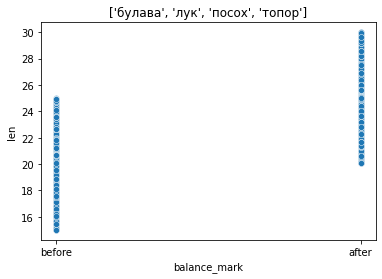

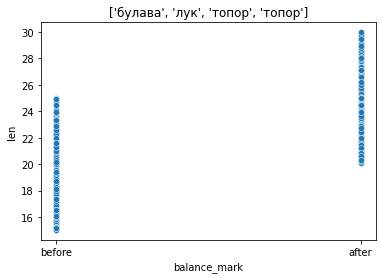

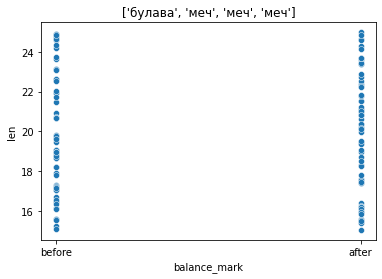

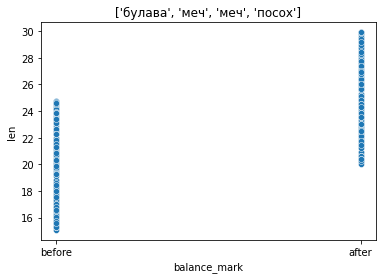

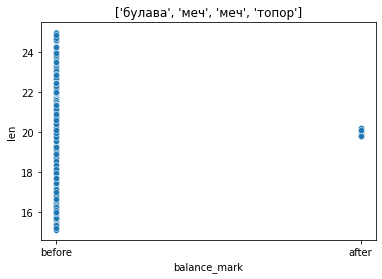

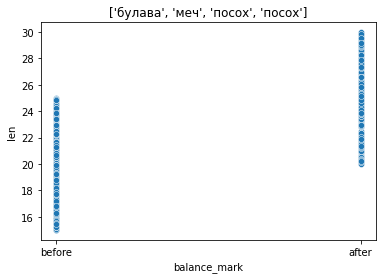

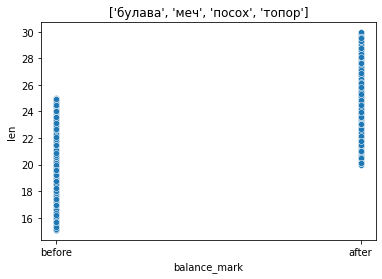

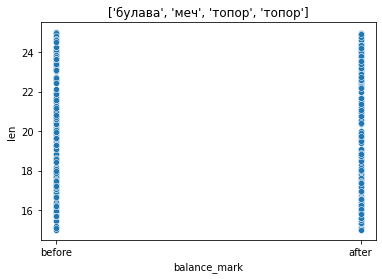

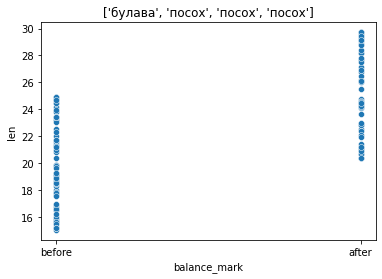

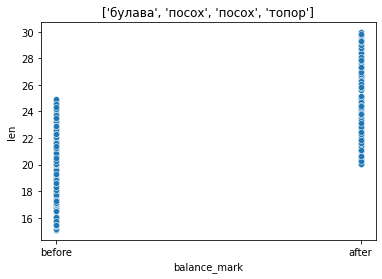

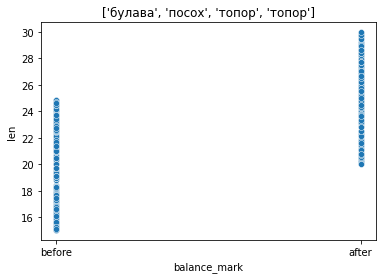

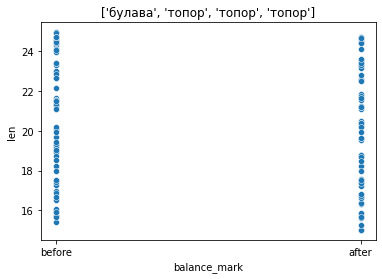

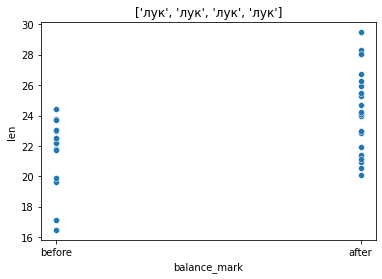

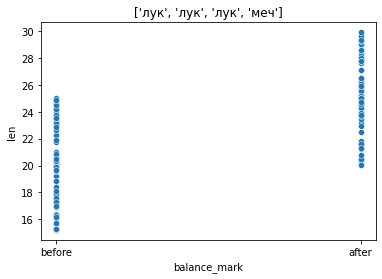

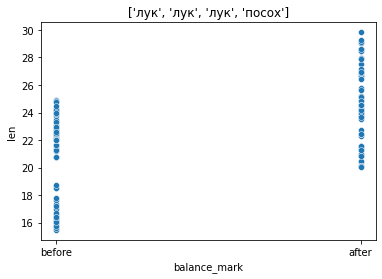

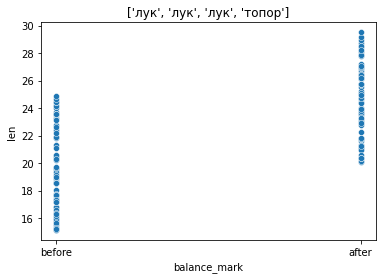

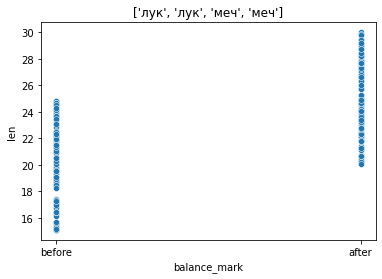

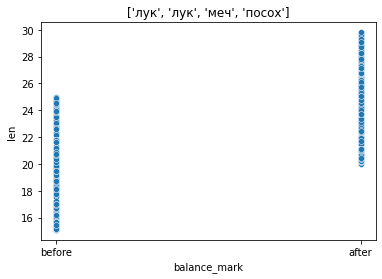

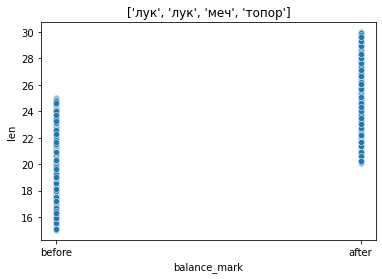

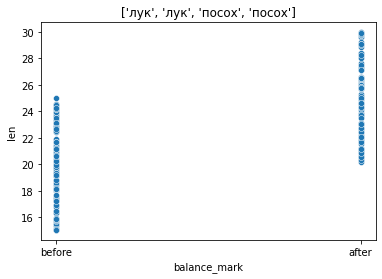

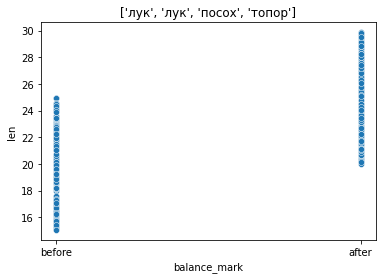

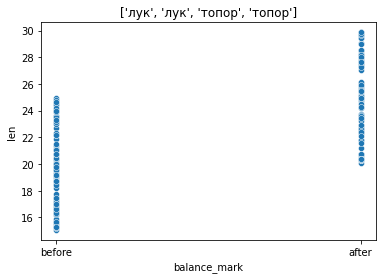

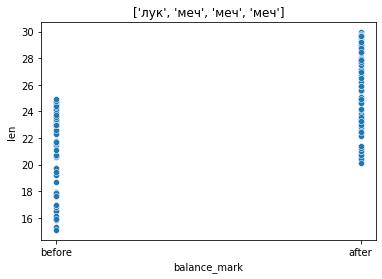

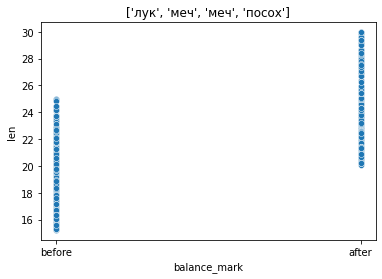

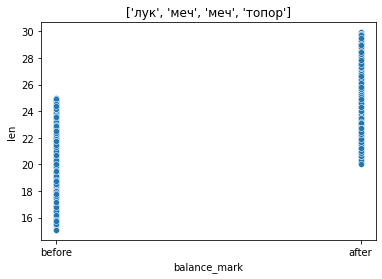

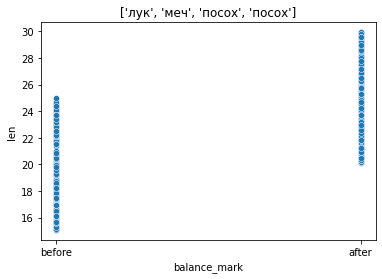

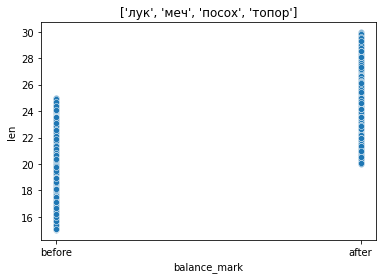

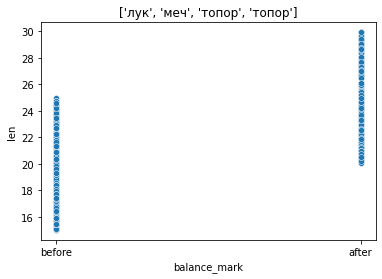

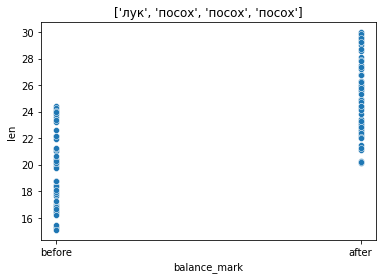

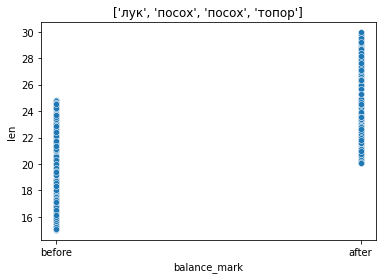

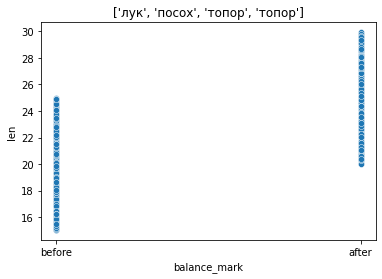

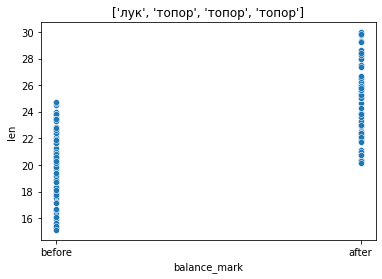

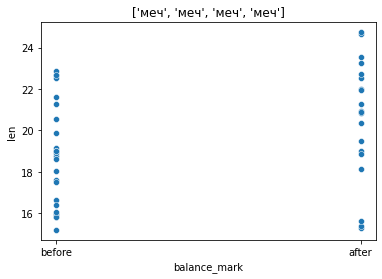

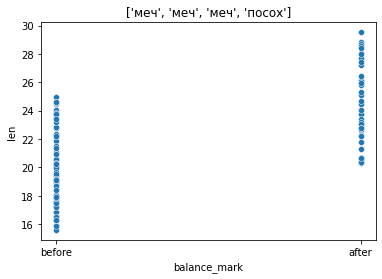

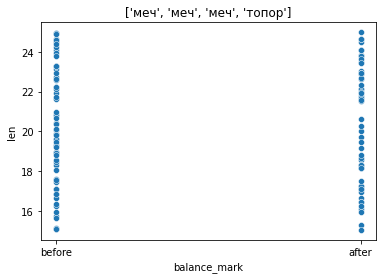

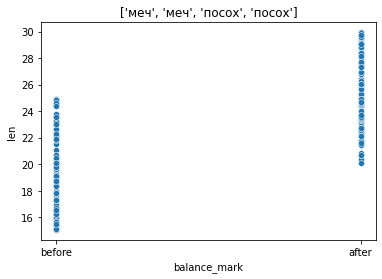

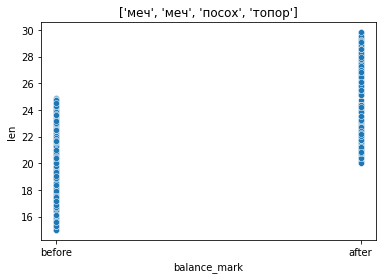

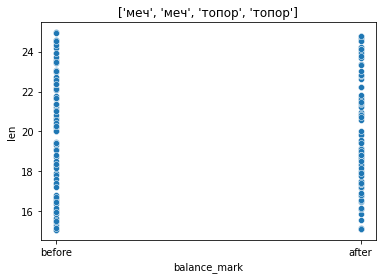

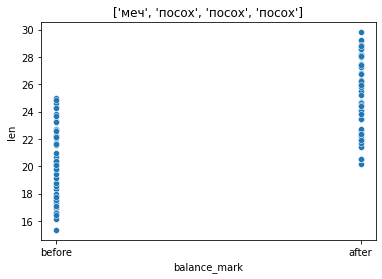

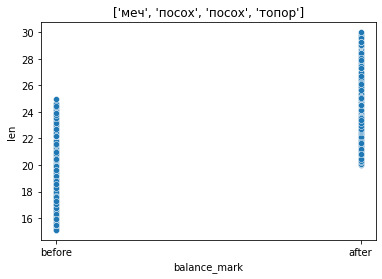

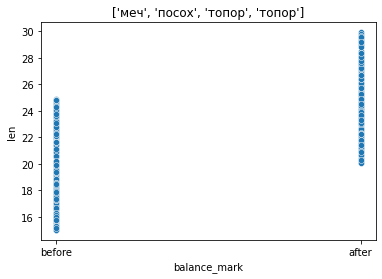

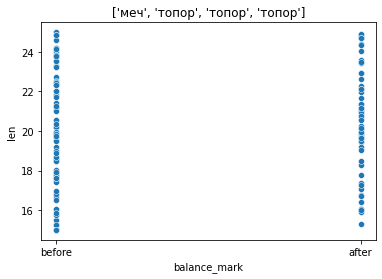

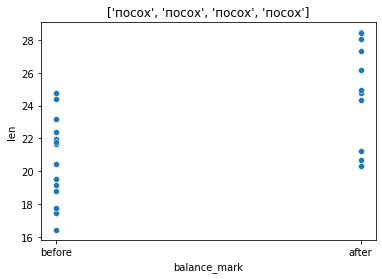

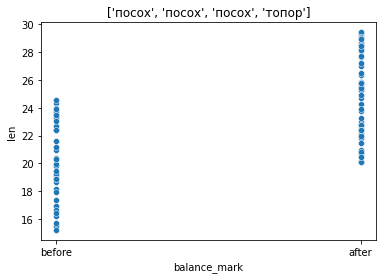

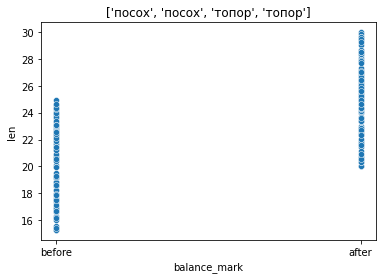

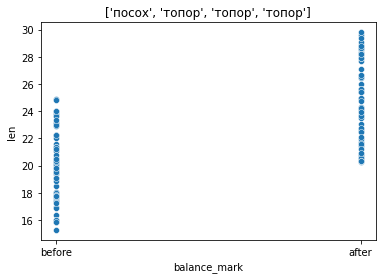

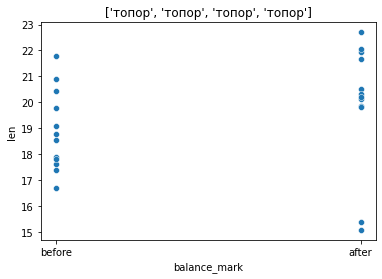

In [333]:
for row in unique_rows:
    tmp = df.loc[np.all(df.iloc[:, 1:5].to_numpy() == row, axis = 1)]
    sns.scatterplot(data = tmp, x = 'balance_mark', y = 'len')
    plt.title(str([inv_d[elm] for elm in row]))
    plt.show()

## Вывод:
для большинства из 70-ти представленных комбинаций оружия после изменения настроек баланса оружия длительность боя увеличивается (в редких случаях, например, для комбинации ['булава', 'булава', 'меч', 'топор'] она уменьшилась).
Однако для комбинаций:

* ['булава', 'булава', 'булава', 'меч'],
* ['булава', 'булава', 'булава', 'топор'],
* ['булава', 'булава', 'меч', 'меч'],
* ['булава', 'булава', 'топор', 'топор'],
* ['булава', 'меч', 'меч', 'меч'],
* ['булава', 'меч', 'топор', 'топор'],
* ['булава', 'топор', 'топор', 'топор'],
* ['меч', 'меч', 'меч', 'топор'],
* ['меч', 'меч', 'топор', 'топор'],
* ['меч', 'топор', 'топор', 'топор'] 

время остается прежним. Из полученных результатов можно сделать вывод, что возможно баланс был изменен в сторону лука и посоха, а урон от меча и топора был уменьшен.